# **1. Introduction and Overview**

**Background**

The dataset(HOSPITAL_SAFETY.xlsx) contains information about two sets of hospitals, one that participated in a policy intervention designed to improve patient safety (Treatment = TRUE), and one that did not.  The goal was to reduce central-line associated blood stream infections (CLABSIs), with lower rates being more desirable. The policy was implemented at the beginning of 2016. The pre-intervention results are in the SIR15 column, and the post-intervention results are in the SIR16 column.

**Task**

Complete an initial analysis of the data to estimate the effect of the intervention on CLABSI rates. 

**Hypotheses**
The null hypothesis is there is no significant increase(or decrease) in the CLABSI rates between 2015 and 2016 in those patients with and without treatment. The alternative hypothesis is that there is a substantial increase(or decrease) in CLABSI rates between 2015 and 2016. Our target variable will be a difference of 2015 rates and 2016 rates.

**Methods**

I will be testing these hypotheses by performing t-tests to obtain a p-value and confidence level using Python and Python libraries, specifically Pandas (for data cleaning and analysis) and Seaborn (for visuals).

**Findings**

Upon testing for normality, I concluded that the data close enought to normal distribution for us to begin testing. We were unable to reject the null from our ttest with pvalue of .1992. There is no effect in CLABSI rates between patients who received intervention versus those that did receive treatment. Treatment does not have an effect on CLABSI rates.

**Conclusions**
We can conclude there is no evidence that the policy intervention is affecting CLABSI rates. 

**Limitations and Future Recommendations**

One potential limiter we have is the amount of missing data we have for important features detrimental to our analysis such as TREATMENT and central-line associated blood stream infection rates(SIR16 & SIR15). 

I initially began this analysis fairly confident we'd be able to perform a t-test and be able to confidently reject or accept the null hypothesis. The target variable not being normally distributed was something that stumped me. During my training through Thinkful, if the data appeared normally distributed, we were not able to fully accept that as being normally distributed. It is always important to check mathematiclaly if that is the case. While it was initiallly taught to me that the levels of skewness and kurtosis were -3 to 3 for both, after some research, I discovered last night that this scale could be more lenient. Some sites stated that kurtosis could be more lenient in that range with -10 to 10. With this new knowledge, I proceeded with accepting our target variable as normally distributed and performed ttest to determine if we would reject or accept the null hypothesis. 

Due to time limitations, I would have liked to perform regression and checked what exact effect treatment had on rates. 

| Feature Name      | Description |
| :---        |    :------   |  
| HOSP.ID      | Hospital Identifier | 
| NAME   | Hospital name | 
| COUNTY | Hospital geographic county | 
| REGION    | US Census Division | 
| URBAN_RURAL   | Defines whether hospital is in an urban or rural location |  
| WAGE_INDEX    | Measures cost of labor in geographic area, where higher values translates to more expensive staff/higher salaries | 
| RESIDENT_TO_BEDS   | Number of medical students per hospital beds| 
| BEDS   | Number of beds available for patients at the hospital| 
| DSHPCT   | Measures the proportion of poor, eledrly, frail, or disabled patients at a hospital, where higher values indicate greater proportions| 
| COST_TO_CHARGE   | A measure of profit, where higher values equal greater profit margins| 
| ANNUAL_VOLUME   | Number of patients seen at the hospital in a given year        | 
| CASEMIX   | Measures patient sickness, where higher levels corresponds to sicker or more complex patients| 
| TYPE   | Hospital type | 
| OWNERSHIP   | Hospital ownership | 
| EMERGENCY_SERVICES   | Emergency services available at this hospital | 
| USES_EHRs   | Uses approved electronic health records | 
| DENOM16   | Number of days patients had a central line in 2016 | 
| SIR16   | CLABSI rate in 2016 | 
| DENOM15   | Number of dates patients had a central line in 2015 | 
| SIR15   | CLABSI rate in 2015 | 
| TREATMENT   | Participation in a national demonsttration to reduce infections. This intervention included the use of a checklist, best practices, and the employment of a full-time patient safety expert that uses advanced analytics. | 

# **2. Hypothesis**
The null and alternative hypotheses are as follows:

**Ho:** There is no effect in CLABSI rates between patients who received intervention versus those that did receive treatment. Treatment does not have an effect on CLABSI rates.

**Ha:** There is a significant difference in CLABSI rates between patients who received intervention versus those that did receive treatment. Treatment does have an effect on CLABSI rates.



# **3. Data**

The dataset contains 3263 patients' data containing 21 features with information such as number of beds available at hospital they stayed at, hospital type, to  central-line associated blood stream infection rates for both 2015 and 2016. Of the 3263 patients, we only have treatment indication info for 3010 patients. Of those 3010 patients whom we currently know whether or not they had treatment, 63% received treamtent. 


In [2]:
# imports
import pandas as pd # add description here
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# import statsmodels.stats.proportion as proportions_ztest

In [3]:
from google.colab import drive # mount google drive to access file
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
root_path = '/content/gdrive/MyDrive/python_for_data_scientists/HOSPITAL_SAFETY__excel.xlsx' # root path of document
df = pd.read_excel(root_path) # upload root path to dataframe

In [15]:
df.head() # brief look at data by looking at top 5 columns

,HOSP.ID,NAME,COUNTY,REGION,URBAN_RURAL,WAGE_INDEX,RESIDENT_TO_BEDS,BEDS,DSHPCT,COST_TO_CHARGE,ANNUAL_VOLUME,CASEMIX,TYPE,OWNERSHIP,EMERGENCY_SERVICES,USES_EHRs,DENOM16,SIR16,DENOM15,SIR15,TREATMENT
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1340,5,OURBAN,0.7704,0.0,408,0.29862,0.197,7939,1.750650,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,7264.0,0.688,7117.0,2.816,1.0
1,10005,MARSHALL MEDICAL CENTER SOUTH,1470,5,RURAL,0.8212,0.0,204,0.27654,0.303,4036,1.343089,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,2464.0,0.000,2786.0,2.114,0.0
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,1380,5,OURBAN,0.7325,0.0,358,0.24028,0.186,5132,1.668372,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,8711.0,1.563,11159.0,0.639,0.0
3,10007,MIZELL MEMORIAL HOSPITAL,1190,5,RURAL,0.6874,0.0,78,0.19347,0.368,645,1.012308,Acute Care Hospitals,Voluntary non-profit - Private,True,1.0,282.0,NaN,48.0,NaN,0.0
4,10008,CRENSHAW COMMUNITY HOSPITAL,1200,5,RURAL,0.6973,0.0,29,0.36918,0.493,285,0.928597,Acute Care Hospitals,Proprietary,True,1.0,55.0,NaN,28.0,NaN,1.0


In [6]:
df.info() # brief summary of dataframe, datatypes, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HOSP.ID             3263 non-null   int64  
 1   NAME                3262 non-null   object 
 2   COUNTY              3263 non-null   int64  
 3   REGION              3263 non-null   int64  
 4   URBAN_RURAL         3263 non-null   object 
 5   WAGE_INDEX          3263 non-null   float64
 6   RESIDENT_TO_BEDS    3263 non-null   float64
 7   BEDS                3263 non-null   int64  
 8   DSHPCT              3263 non-null   float64
 9   COST_TO_CHARGE      3263 non-null   float64
 10  ANNUAL_VOLUME       3263 non-null   int64  
 11  CASEMIX             3263 non-null   float64
 12  TYPE                3263 non-null   object 
 13  OWNERSHIP           3263 non-null   object 
 14  EMERGENCY_SERVICES  3263 non-null   bool   
 15  USES_EHRs           3207 non-null   float64
 16  DENOM1

In [16]:
# percentage of patients who received treatment vs those that did not for patients who we do have that information for. 
print('----Percentage of patients with vs without internvention----')
print((df.TREATMENT.value_counts()/df.shape[0])*100)
print()
print('---Treatment Counts---')
print(df.TREATMENT.value_counts())

----Percentage of patients with vs without internvention----
1.0    63.009500
0.0    29.236899
Name: TREATMENT, dtype: float64

---Treatment Counts---
1.0    2056
0.0     954
Name: TREATMENT, dtype: int64


We have nearly twice the number of patients with internvention as without intervention. A difference in sample size is not an issue for an independent samples t-test. Each sample is large enough and should give reliable estimates, given the data meets the rest of our assumptions.

Let's continue with the analysis.

**Data Cleaning**

One potential limiter we have is the amount of missing data we have for important features detrimental to our analysis such as TREATMENT and central-line associated blood stream infection rates(SIR16 & SIR15).

We will need to address how to handle these missing values before beginnning any analysis. 

In [37]:
# display column name and percentage of missing values
df.isnull().sum()*100/df.isnull().count()

HOSP.ID                0.000000
NAME                   0.030647
COUNTY                 0.000000
REGION                 0.000000
URBAN_RURAL            0.000000
WAGE_INDEX             0.000000
RESIDENT_TO_BEDS       0.000000
BEDS                   0.000000
DSHPCT                 0.000000
COST_TO_CHARGE         0.000000
ANNUAL_VOLUME          0.000000
CASEMIX                0.000000
TYPE                   0.000000
OWNERSHIP              0.000000
EMERGENCY_SERVICES     0.000000
USES_EHRs              1.716212
DENOM16                6.834202
SIR16                 38.553478
DENOM15                6.895495
SIR15                 37.542139
TREATMENT              7.753601
dtype: float64

We note right away by first glance of looking at our data that we have features with missing values. We will need to address these while also taking a closer look at any missing data.

We cannot have any null or missing values directly relating to our target variable, so these rows will need to be eliminated. We note there are features with around 40% of values missing. I felt the best method for this particular case would be to drop the missing values as artificially filling in missing using imputations or other methods could skew our results. 

In [41]:
df.dropna(inplace=True) # drop nulls

# diplay percentage of missing values after dropping nulls
df.isnull().sum()*100/df.isnull().count()

HOSP.ID               0.0
NAME                  0.0
COUNTY                0.0
REGION                0.0
URBAN_RURAL           0.0
WAGE_INDEX            0.0
RESIDENT_TO_BEDS      0.0
BEDS                  0.0
DSHPCT                0.0
COST_TO_CHARGE        0.0
ANNUAL_VOLUME         0.0
CASEMIX               0.0
TYPE                  0.0
OWNERSHIP             0.0
EMERGENCY_SERVICES    0.0
USES_EHRs             0.0
DENOM16               0.0
SIR16                 0.0
DENOM15               0.0
SIR15                 0.0
TREATMENT             0.0
dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 3262
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HOSP.ID             1954 non-null   int64  
 1   NAME                1954 non-null   object 
 2   COUNTY              1954 non-null   int64  
 3   REGION              1954 non-null   int64  
 4   URBAN_RURAL         1954 non-null   object 
 5   WAGE_INDEX          1954 non-null   float64
 6   RESIDENT_TO_BEDS    1954 non-null   float64
 7   BEDS                1954 non-null   int64  
 8   DSHPCT              1954 non-null   float64
 9   COST_TO_CHARGE      1954 non-null   float64
 10  ANNUAL_VOLUME       1954 non-null   int64  
 11  CASEMIX             1954 non-null   float64
 12  TYPE                1954 non-null   object 
 13  OWNERSHIP           1954 non-null   object 
 14  EMERGENCY_SERVICES  1954 non-null   bool   
 15  USES_EHRs           1954 non-null   float64
 16  DENOM1

We now have no missing information now, so we can proceed with our analysis. 

# **4. Methods**

We will create a new variable that represents the difference in CLABSI scores from 2015 and 2016. This will be our target variable. 

In [42]:
# create new variable for differences in CLABSI scores from 2015 to 2016
df['CLABSI_diff'] = df.SIR16 - df.SIR15
df.CLABSI_diff.describe()

count    1954.000000
mean       -0.138336
std         0.886034
min        -7.171000
25%        -0.572000
50%        -0.066000
75%         0.296750
max         6.055000
Name: CLABSI_diff, dtype: float64

In [20]:
no_treatment = df[(df['TREATMENT'] == 0)]
no_treatment.info()
print()
yes_treatment = df[(df['TREATMENT'] == 1)]
yes_treatment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 1 to 3242
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HOSP.ID             755 non-null    int64  
 1   NAME                755 non-null    object 
 2   COUNTY              755 non-null    int64  
 3   REGION              755 non-null    int64  
 4   URBAN_RURAL         755 non-null    object 
 5   WAGE_INDEX          755 non-null    float64
 6   RESIDENT_TO_BEDS    755 non-null    float64
 7   BEDS                755 non-null    int64  
 8   DSHPCT              755 non-null    float64
 9   COST_TO_CHARGE      755 non-null    float64
 10  ANNUAL_VOLUME       755 non-null    int64  
 11  CASEMIX             755 non-null    float64
 12  TYPE                755 non-null    object 
 13  OWNERSHIP           755 non-null    object 
 14  EMERGENCY_SERVICES  755 non-null    bool   
 15  USES_EHRs           755 non-null    float64
 16  DENOM16

Using matplotlib.pyplot we can plot histograms of each sample. By setting alpha = .5, transparency of each histogram is reduced so we can more easily make out overlapping areas.

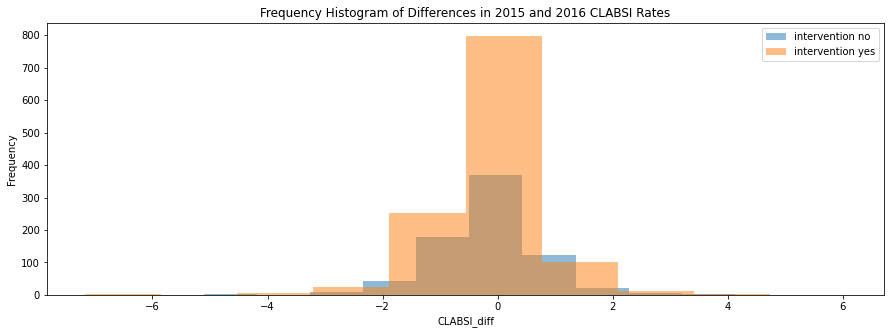

In [21]:
plt.figure(figsize=(15,5))
plt.hist(no_treatment['CLABSI_diff'], alpha = .5, label = "intervention no")
plt.hist(yes_treatment['CLABSI_diff'], alpha = .5, label = "intervention yes")
plt.gca().set(title='Frequency Histogram of Differences in 2015 and 2016 CLABSI Rates', ylabel='Frequency', xlabel='CLABSI_diff')
plt.legend(loc="upper right")
plt.show()

It appears from the histograms that this data does fit a bell curve. We do note that patients with intervential does have a higher peak in distribution. Let's retrieve the exact measures of skewness and kurtosis to determine normality. 

In [48]:
print(stats.describe(no_treatment['CLABSI_diff']))
print(stats.describe(yes_treatment['CLABSI_diff']))

DescribeResult(nobs=755, minmax=(-5.109, 4.125), mean=-0.17076821192052982, variance=0.8229128838688144, skewness=-0.40494385749491874, kurtosis=4.021883477312151)
DescribeResult(nobs=1199, minmax=(-7.171, 6.055), mean=-0.11791326105087571, variance=0.7608037804500412, skewness=-0.7469264762028531, kurtosis=11.309831195559811)


While there's no definitive answer as to the bounds of both kurtosis and skewnews, a good rule of thumb is that anything with kurtosis from -3 to 3 and skewness from -10 to 10 is close enough for a t-test to work well.

With that in mind, our data is close enough to normal we can proceed. 

In [22]:
# conduct the t-test
stats.ttest_ind(no_treatment['CLABSI_diff'], yes_treatment['CLABSI_diff'])

Ttest_indResult(statistic=-1.2841874814030225, pvalue=0.1992287585949289)

Based on our p-value of .1992, we fail to reject the null. We cannot say there is a difference in infections rates after intervention. 

In [23]:
# Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


Below is a graph that shows the confidence interval for both patients with and without intervention. You can see the lines overlap. This means that the expected proportion for intervention patients is similar to what we would expect for proportions for patients who did not receive internvention. We can confidently see there is not a difference.

[[Text(0, 0, 'No Intervention'), Text(0, 0, 'Yes Intervention')]]

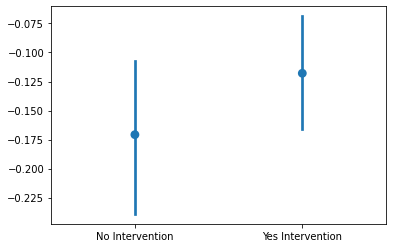

In [24]:
g = sns.pointplot(data=[no_treatment['CLABSI_diff'], 
                   yes_treatment['CLABSI_diff']], join=False)
                        
g.set(xticklabels = ['No Intervention', 'Yes Intervention'])

Correlation between variables

In [30]:
df.corr()

,HOSP.ID,COUNTY,REGION,WAGE_INDEX,RESIDENT_TO_BEDS,BEDS,DSHPCT,COST_TO_CHARGE,ANNUAL_VOLUME,CASEMIX,EMERGENCY_SERVICES,USES_EHRs,DENOM16,SIR16,DENOM15,SIR15,TREATMENT,CLABSI_diff
HOSP.ID,1.000000,0.991722,-0.158242,-0.302516,0.033383,-0.005188,-0.113547,0.124332,0.022321,-0.024406,0.065003,NaN,0.023611,-0.045715,0.022115,-0.064850,0.071846,0.021567
COUNTY,0.991722,1.000000,-0.169986,-0.307485,0.039503,0.006343,-0.106206,0.130078,0.034414,-0.021591,0.070574,NaN,0.030076,-0.051497,0.029008,-0.063315,0.067526,0.015413
REGION,-0.158242,-0.169986,1.000000,0.172688,-0.146898,-0.064507,0.109363,-0.174008,-0.206842,0.212652,-0.059682,NaN,-0.039339,-0.013368,-0.040754,-0.028458,0.057306,0.014967
WAGE_INDEX,-0.302516,-0.307485,0.172688,1.000000,0.155498,0.006037,0.144051,-0.048302,-0.059342,0.052065,-0.077615,NaN,0.003094,0.028699,-0.001898,-0.018299,0.014801,0.040284
RESIDENT_TO_BEDS,0.033383,0.039503,-0.146898,0.155498,1.000000,0.370356,0.366694,0.082991,0.215244,0.322600,-0.009705,NaN,0.465629,0.060456,0.458664,0.102136,-0.163595,-0.043457
BEDS,-0.005188,0.006343,-0.064507,0.006037,0.370356,1.000000,0.190220,-0.092774,0.820877,0.471574,0.059627,NaN,0.853326,0.020433,0.861909,0.027824,-0.055771,-0.008580
DSHPCT,-0.113547,-0.106206,0.109363,0.144051,0.366694,0.190220,1.000000,-0.044022,-0.066784,0.009219,-0.049168,NaN,0.145362,0.100484,0.142280,0.148839,-0.278914,-0.053147
COST_TO_CHARGE,0.124332,0.130078,-0.174008,-0.048302,0.082991,-0.092774,-0.044022,1.000000,-0.016647,-0.149319,-0.014582,NaN,-0.066523,-0.060068,-0.069119,0.012023,0.127392,-0.060348
ANNUAL_VOLUME,0.022321,0.034414,-0.206842,-0.059342,0.215244,0.820877,-0.066784,-0.016647,1.000000,0.368021,0.065920,NaN,0.708691,-0.006136,0.722200,-0.009762,0.024094,0.003859
CASEMIX,-0.024406,-0.021591,0.212652,0.052065,0.322600,0.471574,0.009219,-0.149319,0.368021,1.000000,-0.083846,NaN,0.562465,0.018322,0.562829,0.026000,0.073708,-0.008652


In [35]:
df.USES_EHRs.value_counts()

1.0    1954
Name: USES_EHRs, dtype: int64

In [44]:
df.drop('USES_EHRs', axis=1, inplace=True)

In [45]:
df.corr()['CLABSI_diff'][:]

HOSP.ID               0.021567
COUNTY                0.015413
REGION                0.014967
WAGE_INDEX            0.040284
RESIDENT_TO_BEDS     -0.043457
BEDS                 -0.008580
DSHPCT               -0.053147
COST_TO_CHARGE       -0.060348
ANNUAL_VOLUME         0.003859
CASEMIX              -0.008652
EMERGENCY_SERVICES    0.040242
DENOM16              -0.002556
SIR16                 0.513280
DENOM15              -0.000122
SIR15                -0.633742
TREATMENT             0.029054
CLABSI_diff           1.000000
Name: CLABSI_diff, dtype: float64

Correlations to our target variable are very small. It does not appear any variables in our dataset are correlated with rate difference from 2015 to 2016. 